# Radial free fall in Schwarzschild spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_radial_free_fall.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`


In [1]:
version()

'SageMath version 8.1.rc3, Release Date: 2017-11-23'

In [2]:
%display latex

## Schwarzschild-Droste coordinate $t$ as a function of $\eta$

In [3]:
var('eta r0')
assume(eta>0, eta<pi, r0>2)

The function $\frac{\mathrm{d}t}{\mathrm{d}\eta}$:

In [4]:
dtdeta = r0/2*sqrt(r0/2-1)*(1+cos(eta))^2/(1+cos(eta)-4/r0)
dtdeta

-1/2*r0*sqrt(1/2*r0 - 1)*(cos(eta) + 1)^2/(4/r0 - cos(eta) - 1)

The primitive:

In [5]:
dtdeta.integrate(eta).simplify_full()

1/2*((r0*sqrt(1/2*r0 - 1)*(2*arctan(sin(eta)/(cos(eta) + 1)) + sin(eta)) + 8*sqrt(1/2*r0 - 1)*arctan(sin(eta)/(cos(eta) + 1)))*sqrt(2*r0 - 4) - 8*sqrt(1/2*r0 - 1)*log(-(sqrt(2*r0 - 4)*(cos(eta) + 1) - 2*sin(eta))/(sqrt(2*r0 - 4)*(cos(eta) + 1) + 2*sin(eta))))/sqrt(2*r0 - 4)

Since this is a complicated expression, let us try to find something simpler by taking $u=\eta/2$ as a variable; we have then $\frac{\mathrm{d}t}{\mathrm{d}u}= 2 \frac{\mathrm{d}t}{\mathrm{d}\eta}$:

In [6]:
var('u')
assume(u>0, u<pi/2)
dtdu = 2*dtdeta.subs({eta: 2*u}).simplify_full()
dtdu

2*r0^2*sqrt(1/2*r0 - 1)*cos(u)^4/(r0*cos(u)^2 - 2)

This time, `integrate` yields a simpler expression for $t$:

In [7]:
t = dtdu.integrate(u).simplify_full()
t

(sqrt(2*r0 - 4)*r0*sqrt(1/2*r0 - 1)*cos(u)*sin(u) + (r0*sqrt(1/2*r0 - 1) + 4*sqrt(1/2*r0 - 1))*sqrt(2*r0 - 4)*u - 4*sqrt(1/2*r0 - 1)*log(-(sqrt(2*r0 - 4)*cos(u) - 2*sin(u))/(sqrt(2*r0 - 4)*cos(u) + 2*sin(u))))/sqrt(2*r0 - 4)

We force some obvious simplification by

In [8]:
t = (t*sqrt(2*r0-4)/2/sqrt(r0/2-1)).simplify_full()
t

1/2*(r0*cos(u)*sin(u) + (r0 + 4)*u)*sqrt(2*r0 - 4) - 2*log(-(sqrt(2*r0 - 4)*cos(u) - 2*sin(u))/(sqrt(2*r0 - 4)*cos(u) + 2*sin(u)))

We note that, given the range of $u$, the argument of the logarithm is negative; let us enforce $\ln|x|$ as the primitve of $1/x$ instead of $\ln x$ or $\ln(-x)$:

In [9]:
x = t.operands()[1].operands()[0].operands()[0]
x

-(sqrt(2*r0 - 4)*cos(u) - 2*sin(u))/(sqrt(2*r0 - 4)*cos(u) + 2*sin(u))

In [10]:
t = t.subs({x: abs(x)})
t

1/2*(r0*cos(u)*sin(u) + (r0 + 4)*u)*sqrt(2*r0 - 4) - 2*log(abs((sqrt(2*r0 - 4)*cos(u) - 2*sin(u))/(sqrt(2*r0 - 4)*cos(u) + 2*sin(u))))

We move back to $\eta$, with some extra simplification enforced:

In [11]:
t = t.subs({sqrt(2*r0-4): 2*sqrt(r0/2-1), u: eta/2})
t

1/2*(2*r0*cos(1/2*eta)*sin(1/2*eta) + eta*(r0 + 4))*sqrt(1/2*r0 - 1) - 2*log(abs((sqrt(1/2*r0 - 1)*cos(1/2*eta) - sin(1/2*eta))/(sqrt(1/2*r0 - 1)*cos(1/2*eta) + sin(1/2*eta))))

Finally we invoke `trig_reduce()` to let appear $\sin\eta$:

In [12]:
t = t.trig_reduce().simplify_full()
t

1/2*(eta + sin(eta))*r0*sqrt(1/2*r0 - 1) + 2*eta*sqrt(1/2*r0 - 1) - 2*log(abs(sqrt(1/2*r0 - 1)*cos(1/2*eta) - sin(1/2*eta))/abs(sqrt(1/2*r0 - 1)*cos(1/2*eta) + sin(1/2*eta)))

### Plot of $r$ as a function of $\tau$

In [13]:
tau = sqrt(r0^3/8)*(eta + sin(eta))
tau

1/2*sqrt(1/2)*sqrt(r0^3)*(eta + sin(eta))

In [14]:
r = r0/2*(1 + cos(eta))
r

1/2*r0*(cos(eta) + 1)

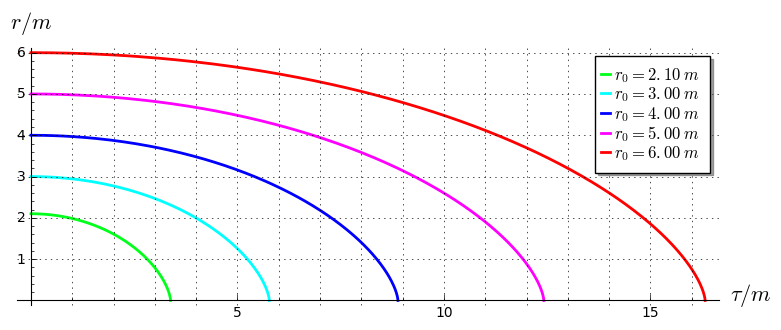

In [15]:
r0_values = [2.1, 3, 4, 5, 6]
graph = Graphics()
for r0_val in r0_values:
    tau1 = tau.subs({r0: r0_val})
    r1 = r.subs({r0: r0_val})
    graph += parametric_plot((tau1, r1), (eta, 0, pi), 
                             color=hue(r0_val/6), thickness=2,
                             legend_label="$r_0 = {:.2f}\\; m$".format(float(r0_val)),
                             axes_labels=[r'$\tau/m$', r'$r/m$'])
show(graph, aspect_ratio=1, gridlines=['minor', 'major'])

In [16]:
graph.save("ges_radial_infall_tau.pdf", aspect_ratio=1, 
           gridlines=['minor', 'major'])

### Plot of $r$ as a function of $t$

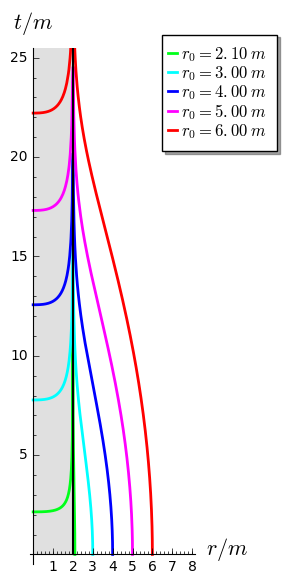

In [17]:
graph = Graphics()
for r0_val in r0_values:
    t1 = t.subs({r0: r0_val})
    r1 = r.subs({r0: r0_val})
    graph += parametric_plot((r1, t1), (eta, 0, pi), plot_points=300,
                             color=hue(r0_val/6), thickness=2,
                             legend_label="$r_0 = {:.2f}\\; m$".format(float(r0_val)),
                             axes_labels=[r'$r/m$', r'$t/m$'])
graph += polygon([(0,0), (2,0), (2,26), (0,26)], color='lightgrey', alpha=0.7)
graph += line([(2,0), (2, 26)], thickness=1.5, color='black')
show(graph, xmin=0, xmax=8, ymin=0, ymax=25,
     aspect_ratio=1, legend_loc=(0.8,0.8))

In [18]:
graph.save("ges_radial_infall_t.pdf", xmin=0, xmax=8, ymin=0, ymax=25,
            aspect_ratio=1, legend_loc=(0.8,0.8))

### Spacetime diagram based on IEF coordinates

In [19]:
ti = 2*(sqrt(r0/2-1)*(eta + r0/4*(eta + sin(eta))) + 
        2*ln(cos(eta/2) + 1/sqrt(r0/2-1)*sin(eta/2)))
ti

1/2*((eta + sin(eta))*r0 + 4*eta)*sqrt(1/2*r0 - 1) + 4*log(sin(1/2*eta)/sqrt(1/2*r0 - 1) + cos(1/2*eta))

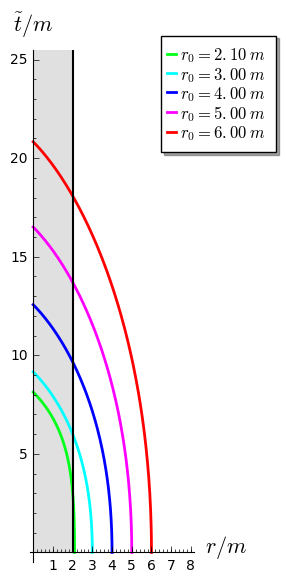

In [20]:
graph = Graphics()
for r0_val in r0_values:
    ti1 = ti.subs({r0: r0_val})
    r1 = r.subs({r0: r0_val})
    graph += parametric_plot((r1, ti1), (eta, 0, pi), 
                             color=hue(r0_val/6), thickness=2,
                             legend_label="$r_0 = {:.2f}\\; m$".format(float(r0_val)),
                             axes_labels=[r'$r/m$', r'$\tilde{t}/m$'])
graph += polygon([(0,0), (2,0), (2,26), (0,26)], color='lightgrey', alpha=0.7)
graph += line([(2,0), (2, 26)], thickness=1.5, color='black')
show(graph, xmin=0, xmax=8, ymin=0, ymax=25,
     aspect_ratio=1, legend_loc=(0.8,0.8))

In [21]:
graph.save("ges_radial_infall_IEF.pdf", xmin=0, xmax=8, ymin=0, ymax=25,
           aspect_ratio=1, legend_loc=(0.8,0.8))

### Infall time

In [22]:
tif = 2*(pi*sqrt(r0/2-1)*(r0/4+1) - ln(r0/2-1))
tif

1/2*pi*(r0 + 4)*sqrt(1/2*r0 - 1) - 2*log(1/2*r0 - 1)

In [23]:
tih = 2*(2*(1+r0/4)*sqrt(r0/2-1)*atan(sqrt(r0/2-1)) + r0/2-1 -ln(r0/2))
tih

(r0 + 4)*sqrt(1/2*r0 - 1)*arctan(sqrt(1/2*r0 - 1)) + r0 - 2*log(1/2*r0) - 2

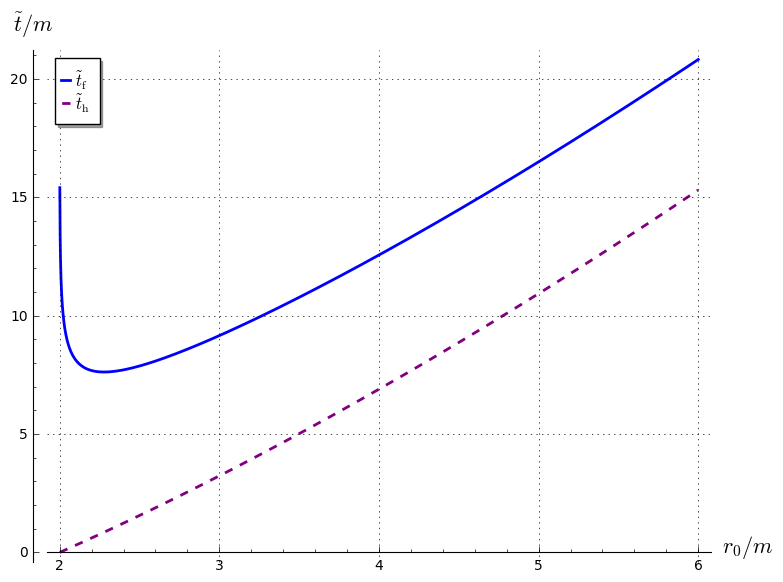

In [24]:
graph = plot(tif, (r0, 2.001, 6), thickness=2, 
             legend_label=r'$\tilde{t}_{\rm f}$',
             axes_labels=[r'$r_0/m$', r'$\tilde{t}/m$'], gridlines=True)
graph += plot(tih, (r0, 2.001, 6), linestyle='--', thickness=2, 
              legend_label=r'$\tilde{t}_{\rm h}$', color='purple')
graph

In [25]:
tauf = pi*sqrt(r0^3/8)
tauf

1/2*sqrt(1/2)*pi*sqrt(r0^3)

In [26]:
tauh = sqrt(r0^3/2)*(atan(sqrt(r0/2-1)) + sqrt(2/r0*(1-2/r0)))
tauh

sqrt(1/2)*sqrt(r0^3)*(sqrt(2)*sqrt(-(2/r0 - 1)/r0) + arctan(sqrt(1/2*r0 - 1)))

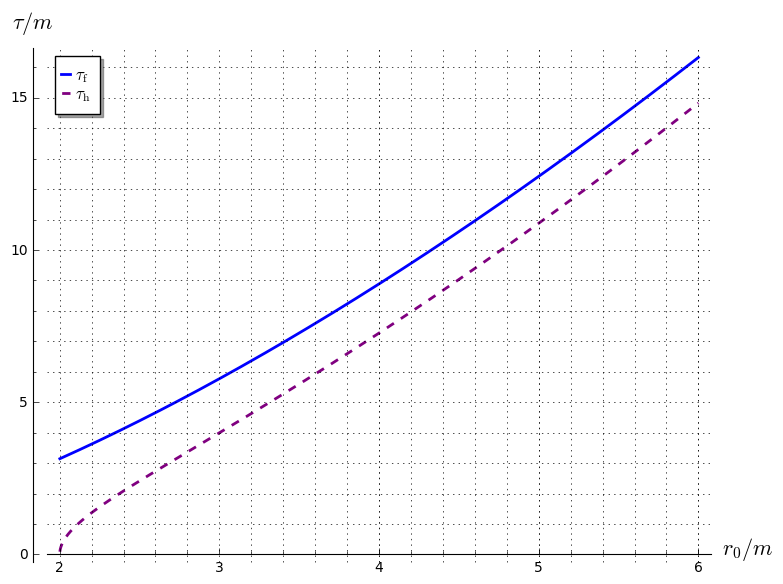

In [27]:
graph = plot(tauf, (r0, 2.001, 6), thickness=2, 
             legend_label=r'$\tau_{\rm f}$',
             axes_labels=[r'$r_0/m$', r'$\tau/m$'], gridlines='minor')
graph += plot(tauh, (r0, 2.001, 6), linestyle='--', thickness=2, 
              legend_label=r'$\tau_{\rm h}$', color='purple')
graph

In [28]:
graph.save("ges_infall_time.pdf")

### Proper time spent inside the black hole

In [29]:
taui = (tauf - tauh).simplify_full()
taui

1/4*(sqrt(2)*pi - 2*sqrt(2)*arctan(sqrt(1/2*r0 - 1)) - 4*sqrt((r0 - 2)/r0^2))*r0^(3/2)

In [30]:
lim(taui, r0 = 2)

pi

In [31]:
lim(taui, r0 = +oo)

4/3

We may check the above limit by asking for a Taylor expansion in terms of $u=1/r_0$:

In [32]:
var('u')
s = taui.subs({r0: 1/u}).simplify_full()
s

1/4*(sqrt(2)*pi - 4*u*sqrt(-(2*u - 1)/u) - 2*sqrt(2)*arctan(1/2*sqrt(2)*sqrt(-(2*u - 1)/u)))/u^(3/2)

In [33]:
s.taylor(u, 0, 2)

6/7*u^2 + 4/5*u + 4/3

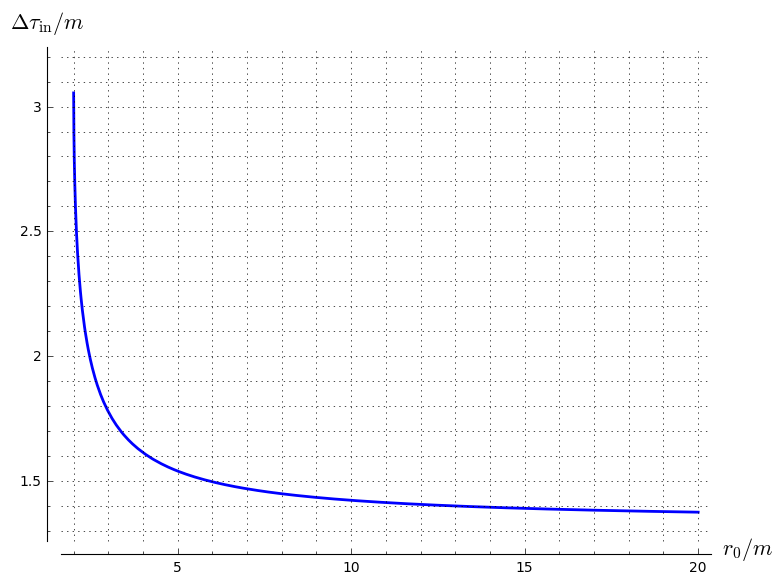

In [34]:
graph = plot(tauf - tauh, (r0, 2.001, 20), thickness=2, 
             axes_labels=[r'$r_0/m$', r'$\Delta\tau_{\rm in}/m$'], 
             ymin=1.3, ymax = 3.2, gridlines='minor')
graph

In [35]:
graph.save("ges_time_inside.pdf")